In [17]:
%matplotlib inline
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27),'legend.fontsize': 18})

mountain = ['Data/rewards_400_ours_mountain','Data/rewards_400_dqn_mountain','Data/rewards_500_pg_mountain']
lunar = ['Data/rewards_500_our_lunar','Data/rewards_500_dqn_lunar','Data/rewards_500_pg_lunar']

def get_merged_df(prefix,name):
    df1 = pd.read_csv(prefix + '_1.csv').iloc[:,1]
    df2 = pd.read_csv(prefix + '_2.csv').iloc[:,1]
    df3 = pd.read_csv(prefix + '_3.csv').iloc[:,1]
    merged = pd.concat([df1,df2,df3],axis=1)
    merged.columns = [name] * 3
    return merged

a_df = get_merged_df('Data/rewards_500_our_lunar','DQN (model-based exploration)')
b_df = get_merged_df('Data/rewards_500_dqn_lunar','DQN')
c_df = get_merged_df('Data/rewards_500_pg_lunar','Monte Carlo Policy Gradient')
df = pd.concat([a_df,b_df,c_df],axis=1)
df = df.expanding().mean()
df = df.iloc[:500,:]
df.tail()


,DQN (model-based exploration),DQN (model-based exploration),DQN (model-based exploration),DQN,DQN,DQN,Monte Carlo Policy Gradient,Monte Carlo Policy Gradient,Monte Carlo Policy Gradient
495,-240.000298,-252.556149,-235.300394,-251.458348,-289.260826,-241.332284,-123.296189,-39.080527,-72.094726
496,-239.762379,-252.270959,-235.046346,-251.120311,-289.152346,-241.190329,-123.039712,-39.153316,-72.013322
497,-239.636974,-251.958347,-234.864308,-250.889464,-289.737753,-241.134388,-122.587446,-39.231307,-72.147314
498,-239.410977,-251.742203,-235.894661,-251.030877,-289.480363,-241.271760,-122.311717,-39.244993,-72.029860
499,-239.324514,-251.684562,-236.385322,-251.235771,-289.305293,-241.442952,-122.050892,-39.335315,-71.885310


Text(0, 0.5, 'Average rewards')

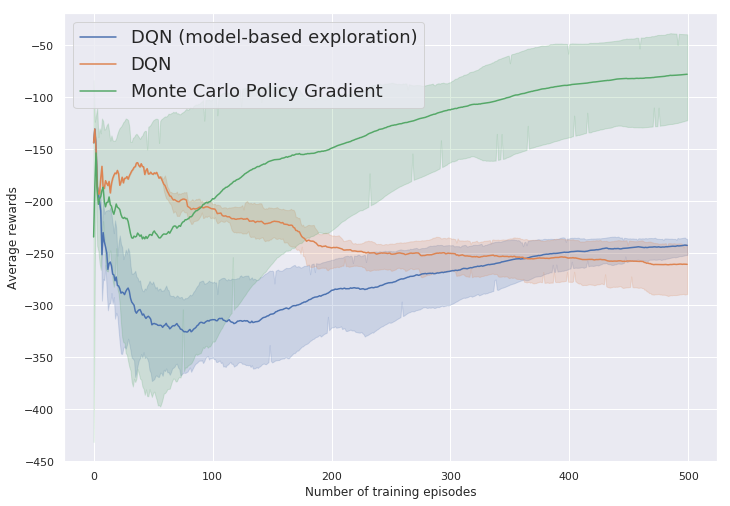

In [18]:
ax = sns.lineplot(data=df,color="red", dashes=False)
#ax.lines[0].set_linestyle("-")
#ax.lines[1].set_linestyle("-")
#ax.lines[2].set_linestyle("-")

ax.set_xlabel('Number of training episodes')
ax.set_ylabel('Average rewards')